<a href="https://colab.research.google.com/github/RamilaKhatri/Course_Work1_AI/blob/main/2550038_Ramila_Khatri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Setup: libraries and plotting style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 6)

csv_path = "WHR20245CS037_a1bfcb8e-f3d5-49cf-9072-5f0f6923bbef_264243_.csv"
df = pd.read_csv("/content/drive/MyDrive/AI/" + csv_path)

# Inspect columns exactly as provided
print("Dataset columns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

Dataset columns: ['Country name', 'score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']

First 5 rows:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298


 Problem- 1: Getting Started with Data Exploration- Some Warm up
 Exercises:
 1. Data Exploration and Understanding:
  • Dataset Overview:
 1. Load the dataset and display the first 10 rows.
 2. Identify the number of rows and columns in the dataset.
 3. List all the columns and their data types.
 • Basic Statistics:
 1. Calculate the mean, median, and standard deviation for the Score column.
 2. Identify the country with the highest and lowest happiness scores.
 • Missing Values:
 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
 • Filtering and Sorting:
 1. Filter the dataset to show only the countries with a Score greater than 7.5.
 2. For the filtered dataset- Sort the dataset by GDP per Capita in descending order and display the
 top 10 rows
   Adding New Columns:
 1. Create a new column called Happiness Category that categorizes countries into three categories
 based on their Score:
 Low −(Score < 4)
 Medium −(4 ≤ Score ≤ 6)
 High −(Score > 6)

In [46]:
#  Dataset overview
print("="*60)
print("DATASET OVERVIEW")
print("="*60)

#1)First 10 rows
print("\n1. First 10 rows:")
display(df.head(10))

#2)shape: rows and columns
ows, cols = df.shape
print(f"\n2. Dataset shape:")
print(f"   Rows: {rows}, Columns: {cols}")

#3)Column names and data types
print("\n3. Column names and data types:")
print(df.dtypes)

#  Basic statistics on 'score'for socre
#1)mean. median, and stanfarf deviation
print("\n4. Basic statistics on happiness 'score':")
score_stats = df['score'].describe()
print(f"   Mean: {score_stats['mean']:.3f}")
print(f"   Median: {df['score'].median():.3f}")
print(f"   Std: {score_stats['std']:.3f}")
print(f"   Min: {score_stats['min']:.3f}")
print(f"   Max: {score_stats['max']:.3f}")
print(f"   Q1 (25%): {score_stats['25%']:.3f}")
print(f"   Q3 (75%): {score_stats['75%']:.3f}")

# 2)Highest and lowest happiness scores**
max_row = df.loc[df['score'].idxmax()]
min_row = df.loc[df['score'].idxmin()]

print("\n5. Highest and lowest happiness score:")
print(f"   Highest: {max_row['Country name']} with score {max_row['score']:.3f}")
print(f"   Lowest: {min_row['Country name']} with score {min_row['score']:.3f}")


#  Missing values check
missing_values = df.isna().sum() # Define missing_values
print("\n6. Missing values per column:")
if missing_values.sum() > 0:
      print(missing_values[missing_values > 0])
else:
      print("No missing values found!")

#  Filtering and sorting:
print("\n7. Filtering and sorting analysis:")

# 1)Filter: Score > 7.5
filtered_high = df[df['score'] > 7.5]
print(f"   Countries with score > 7.5: {len(filtered_high)} countries")
display(filtered_high[['Country name', 'score', 'Log GDP per capita']].sort_values('score', ascending=False))


# 2)Sort the filtered dataset by Log GDP per capita desc and show top 10
sorted_filtered = filtered_high.sort_values('Log GDP per capita', ascending=False).head(10)
print("\n   Top 10 by Log GDP per capita (among score > 7.5):")
display(sorted_filtered[['Country name', 'score', 'Log GDP per capita']])

#Happiness_Category distribution (now expected to be created in the first cell)
print("\n8. 'Happiness_Category' distribution:")
if 'Happiness_Category' in df.columns:
    original_counts = df['Happiness_Category'].value_counts()
    print(original_counts)
else:
    print("Column 'Happiness_Category' not found in dataset")

print("\n" + "="*60)
print("DATASET OVERVIEW COMPLETE")
print("="*60)

DATASET OVERVIEW

1. First 10 rows:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,High
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,High
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,High
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,High
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745,High



2. Dataset shape:
   Rows: 143, Columns: 10

3. Column names and data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
Happiness_Category               object
dtype: object

4. Basic statistics on happiness 'score':
   Mean: 5.528
   Median: 5.785
   Std: 1.171
   Min: 1.721
   Max: 7.741
   Q1 (25%): 4.726
   Q3 (75%): 6.416

5. Highest and lowest happiness score:
   Highest: Finland with score 7.741
   Lowest: Afghanistan with score 1.721

6. Missing values per column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
D

,Country name,score,Log GDP per capita
0,Finland,7.741,1.844
1,Denmark,7.583,1.908
2,Iceland,7.525,1.881



   Top 10 by Log GDP per capita (among score > 7.5):


,Country name,score,Log GDP per capita
1,Denmark,7.583,1.908
2,Iceland,7.525,1.881
0,Finland,7.741,1.844



8. 'Happiness_Category' distribution:
Happiness_Category
Medium    70
High      56
Low       17
Name: count, dtype: int64

DATASET OVERVIEW COMPLETE


2. Data Visualizations:
 • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

 • Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

  • Plot a histogram for the Score column to show its distribution and also interpret.

  • Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.



DATA VISUALIZATIONS

1. Creating visualization: Top 10 happiest countries
2. Creating visualization: Top 10 unhappiest countries
3. Creating visualization: Distribution of happiness scores
4. Creating visualization: Relationship between GDP and happiness


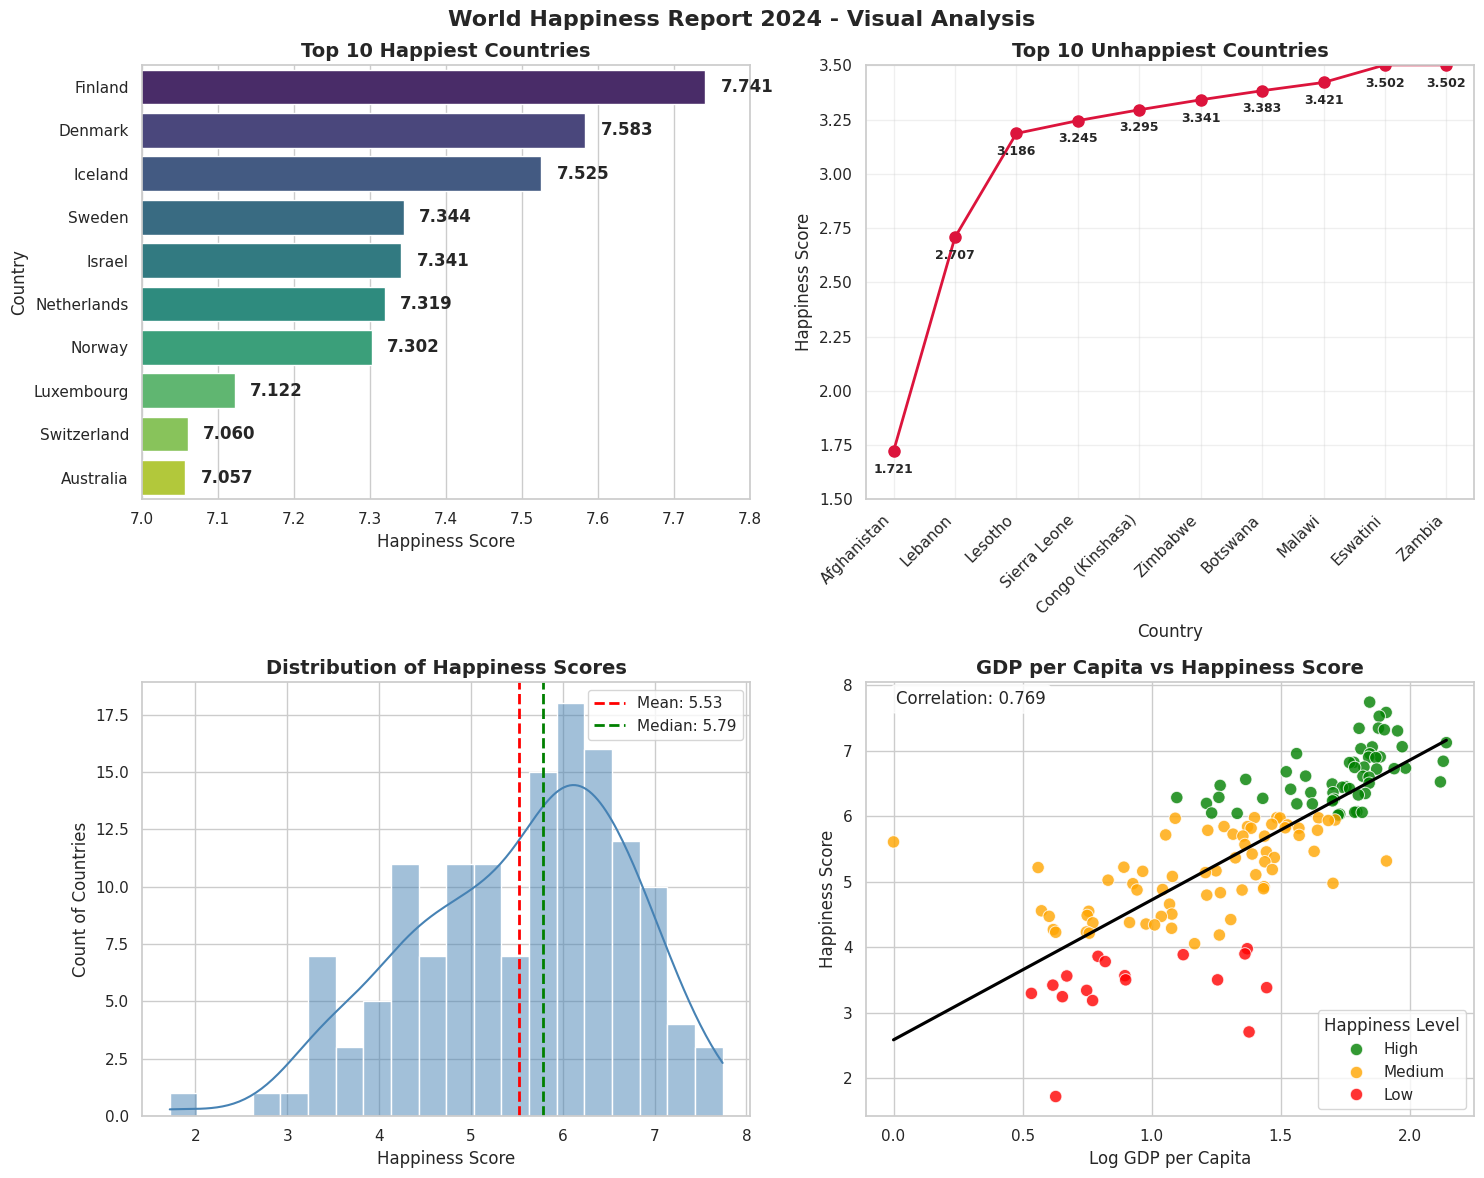


VISUALIZATIONS COMPLETE


In [63]:
# Data Visualizations

print("\n" + "="*60)
print("DATA VISUALIZATIONS")
print("="*60)

# Create a figure with all visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('World Happiness Report 2024 - Visual Analysis', fontsize=16, fontweight='bold')

# 1) Bar Plot: Top 10 happiest countries
print("\n1. Creating visualization: Top 10 happiest countries")
top10_happy = df.sort_values('score', ascending=False).head(10)
ax1 = axes[0, 0]
sns.barplot(data=top10_happy, x='score', y='Country name', palette='viridis', ax=ax1, hue='Country name', legend=False)
ax1.set_title("Top 10 Happiest Countries", fontsize=14, fontweight='bold')
ax1.set_xlabel("Happiness Score", fontsize=12)
ax1.set_ylabel("Country", fontsize=12)
ax1.set_xlim(7, 7.8)  # Focus on the high score range

# Add value labels on bars
for i, v in enumerate(top10_happy['score']):
    ax1.text(v + 0.02, i, f'{v:.3f}', va='center', fontweight='bold')

 # 2) Line Plot: Top 10 unhappiest countries
print("2. Creating visualization: Top 10 unhappiest countries")
bottom10_unhappy = df.sort_values('score', ascending=True).head(10)
ax2 = axes[0, 1]
ax2.plot(bottom10_unhappy['Country name'], bottom10_unhappy['score'],
         marker='o', linestyle='-', linewidth=2, markersize=8, color='crimson')
ax2.set_title("Top 10 Unhappiest Countries", fontsize=14, fontweight='bold')
ax2.set_xlabel("Country", fontsize=12)
ax2.set_ylabel("Happiness Score", fontsize=12)
ax2.set_xticks(range(len(bottom10_unhappy['Country name'])))
ax2.set_xticklabels(bottom10_unhappy['Country name'], rotation=45, ha='right')
ax2.set_ylim(1.5, 3.5)  # Focus on the low score range
ax2.grid(True, alpha=0.3)

# Add value labels on points
for i, v in enumerate(bottom10_unhappy['score']):
    ax2.text(i, v - 0.1, f'{v:.3f}', ha='center', fontweight='bold', fontsize=9)

# 3) Histogram of score distribution with KDE
print("3. Creating visualization: Distribution of happiness scores")
ax3 = axes[1, 0]
sns.histplot(df['score'], bins=20, kde=True, color='steelblue', ax=ax3)
ax3.set_title("Distribution of Happiness Scores", fontsize=14, fontweight='bold')
ax3.set_xlabel("Happiness Score", fontsize=12)
ax3.set_ylabel("Count of Countries", fontsize=12)

# Add vertical lines for mean and median
mean_score = df['score'].mean()
median_score = df['score'].median()
ax3.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.2f}')
ax3.axvline(median_score, color='green', linestyle='--', linewidth=2, label=f'Median: {median_score:.2f}')
ax3.legend()

# 4) Scatter: Log GDP per capita vs score with regression line
print("4. Creating visualization: Relationship between GDP and happiness")
ax4 = axes[1, 1]

# Use the NEW column 'Happiness_Category' for coloring
scatter = sns.scatterplot(data=df, x='Log GDP per capita', y='score',
                          hue='Happiness_Category',
                          palette={'Low':'red', 'Medium':'orange', 'High':'green'},
                          s=80, alpha=0.8, ax=ax4)

# Add regression line (black)
sns.regplot(data=df, x='Log GDP per capita', y='score',
            scatter=False, color='black', ci=None, ax=ax4)

ax4.set_title("GDP per Capita vs Happiness Score", fontsize=14, fontweight='bold')
ax4.set_xlabel("Log GDP per Capita", fontsize=12)
ax4.set_ylabel("Happiness Score", fontsize=12)
ax4.legend(title='Happiness Level', title_fontsize=12)

# Calculate and display correlation
correlation = df['Log GDP per capita'].corr(df['score'])
ax4.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
         transform=ax4.transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("VISUALIZATIONS COMPLETE")
print("="*60)



 Problem- 2- Some Advance Data Exploration Task:
 Task- 1- Setup Task- Preparing the South-Asia Dataset:
 Steps:
 1. Define the countries in South Asia with a list for example:
 south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
 "Maldives", "Nepal", "Pakistan", "Srilanka"]
 2. Use the list from step- 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
 3. Save the filtered dataframe as separate CSV files for future use.

 Task- 2- Composite Score Ranking:
 Tasks:

 01. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
 following metrics:
 Composite Score = 0.40×GDP per Capita+0.30×Social Support
 +0.30 ×Healthy Life Expectancy
 02. Rank the South Asian countries based on the Composite Score in descending order.
 03. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
 04. Discuss whether the rankings based on the Composite Score align with the original Score- support your
 discussion with some visualization plot.


SOUTH ASIA ANALYSIS
South Asia countries found in this dataset:
['Nepal', 'Pakistan', 'India', 'Sri Lanka', 'Bangladesh', 'Afghanistan']

Saved SouthAsia_WHappiness.csv

--- Task 2: Composite Score Ranking ---

South Asia ranked by Composite Score (descending):


,Country name,Composite Score,score
127,Sri Lanka,1.0739,3.898
92,Nepal,0.8159,5.158
125,India,0.7874,4.054
107,Pakistan,0.7039,4.657
128,Bangladesh,0.6774,3.886
142,Afghanistan,0.3238,1.721


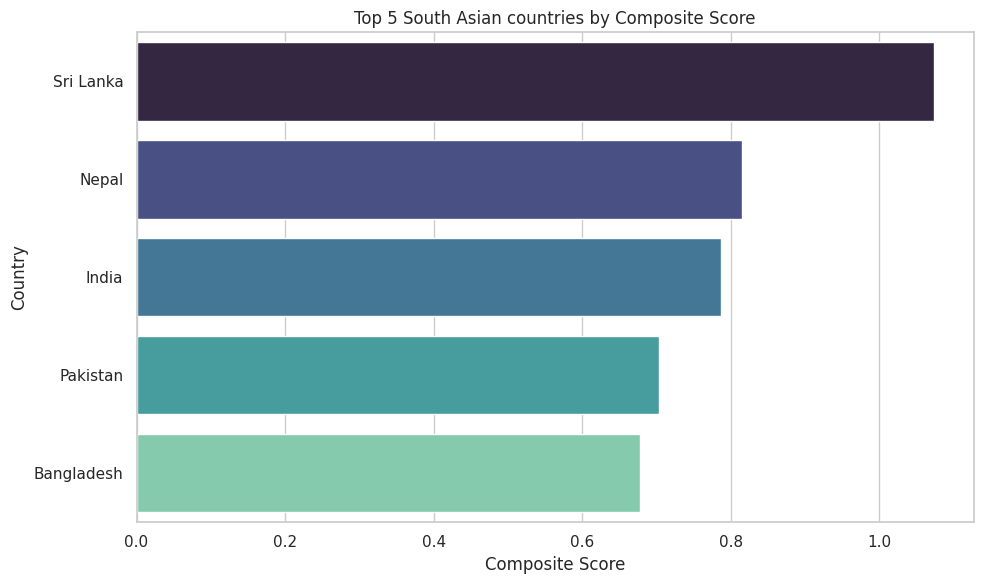

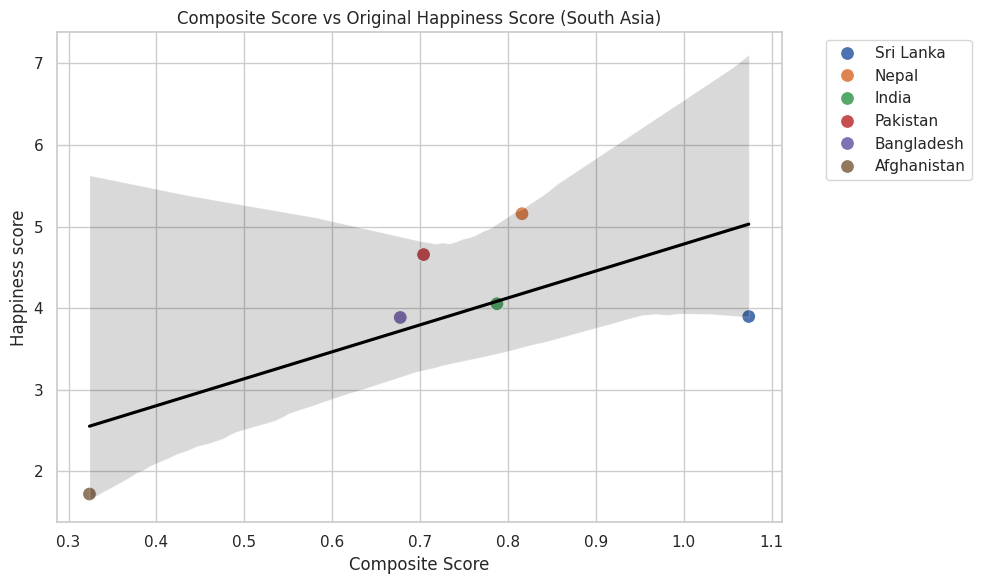

In [49]:
#South Asia Analysis
print("\n" + "="*60)
print("SOUTH ASIA ANALYSIS")
print("="*60)
# Task 1: Prepare South Asia dataset:
south_asia_list = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia_df = df[df['Country name'].isin(south_asia_list)].copy()

print("South Asia countries found in this dataset:")
print(list(south_asia_df['Country name']))

# 3)Save to CSV for future use
south_asia_df.to_csv("SouthAsia_WHappiness.csv", index=False)
print("\nSaved SouthAsia_WHappiness.csv")

# Task 2: Composite Score Ranking
print("\n--- Task 2: Composite Score Ranking ---")
# Check for missing data
for col in ['Log GDP per capita', 'Social support', 'Healthy life expectancy']:
    if south_asia_df[col].isna().any():
        print(f"Warning: Missing data found in {col}")
#Create composite score
sa_comp = south_asia_df.dropna(subset=['Log GDP per capita', 'Social support', 'Healthy life expectancy']).copy()
sa_comp['Composite Score'] = (
    0.40 * sa_comp['Log GDP per capita'] +
    0.30 * sa_comp['Social support'] +
    0.30 * sa_comp['Healthy life expectancy']
)
# 2)Rank the South Asian countries based on the Composite Score in descending order.
sa_ranked = sa_comp.sort_values('Composite Score', ascending=False)
print("\nSouth Asia ranked by Composite Score (descending):")
display(sa_ranked[['Country name', 'Composite Score', 'score']])

#3) Visualize top 5 by Composite Score as horizontal bar
top5_comp = sa_ranked.head(5)
plt.figure()
sns.barplot(data=top5_comp, x='Composite Score', y='Country name', hue='Country name', palette='mako', legend=False)
plt.title("Top 5 South Asian countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 4)Compare Composite ranking vs original score ranking
sa_score_ranked = south_asia_df.sort_values('score', ascending=False)[['Country name', 'score']]
comparison = sa_ranked[['Country name', 'Composite Score']].merge(sa_score_ranked, on='Country name', how='left')

plt.figure()
sns.scatterplot(data=comparison, x='Composite Score', y='score', hue='Country name', s=100)
sns.regplot(data=comparison, x='Composite Score', y='score', scatter=False, color='black')
plt.title("Composite Score vs Original Happiness Score (South Asia)")
plt.xlabel("Composite Score")
plt.ylabel("Happiness score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 Task- 3- Outlier Detection:
 Tasks:
 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
 2. Define outliers using the 1.5 × IQR rule.
 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
 in a different color.
 4. Discuss the characteristics of these outliers and their potential impact on regional averages.

IQR bounds:
score lower/upper: (np.float64(2.963125000000001), np.float64(5.432124999999999))
Log GDP per capita lower/upper: (np.float64(0.7449999999999999), np.float64(1.401))

Outliers detected:


,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


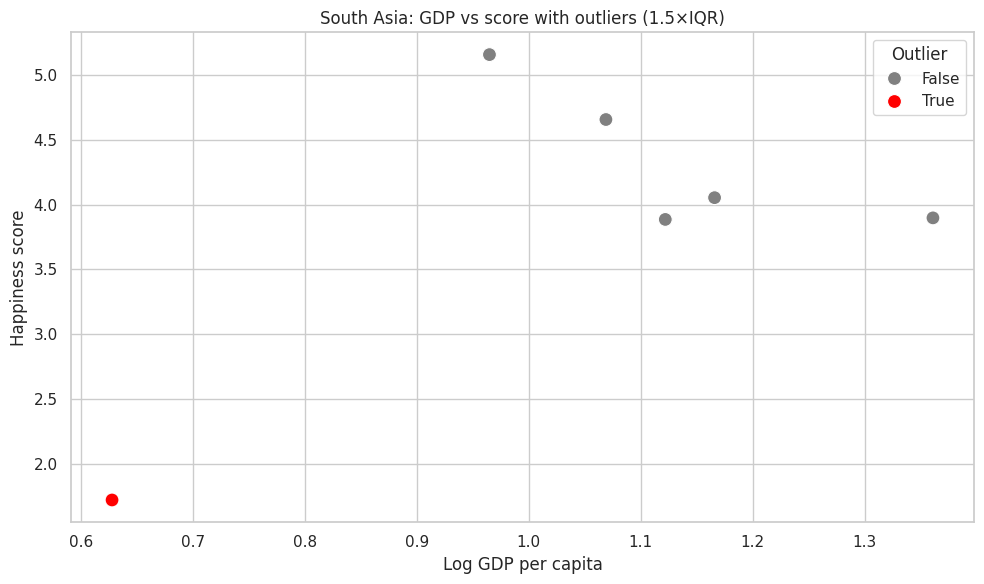

In [51]:
#Task-3-Outlier Detection:
# 1)Define outliers on 'score' and 'Log GDP per capita' using 1.5*IQR
sa_out = south_asia_df.dropna(subset=['score', 'Log GDP per capita']).copy()

#2)Define outliers
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (series < lower) | (series > upper)
    return mask, (lower, upper)

score_mask, score_bounds = iqr_outliers(sa_out['score'])
gdp_mask, gdp_bounds = iqr_outliers(sa_out['Log GDP per capita'])

# Combined outlier if outlier in either dimension
sa_out['Outlier'] = score_mask | gdp_mask

print("IQR bounds:")
print(f"score lower/upper: {score_bounds}")
print(f"Log GDP per capita lower/upper: {gdp_bounds}")
print("\nOutliers detected:")
display(sa_out[sa_out['Outlier']][['Country name', 'score', 'Log GDP per capita']])

# 3)Scatter highlighting outliers
plt.figure()
sns.scatterplot(
    data=sa_out,
    x='Log GDP per capita', y='score',
    hue='Outlier', palette={False: 'gray', True: 'red'}, s=100
)
plt.title("South Asia: GDP vs score with outliers (1.5×IQR)")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness score")
plt.legend(title='Outlier')
plt.tight_layout()
plt.show()

 Task- 4- Exploring Trends Across Metrics:
 Tasks:
 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
 {pearson correlation} with the Score for South Asian countries.
 2. Create scatter plots with trendlines for these metrics against the Score.
 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
 South Asian countries.

Pearson correlation (Freedom vs score): 0.801
Pearson correlation (Generosity vs score): 0.875


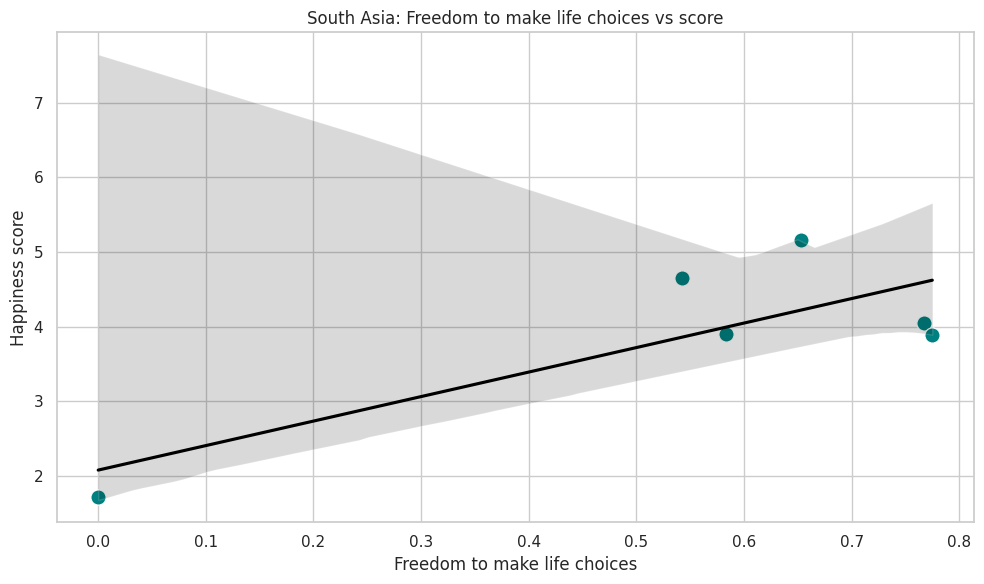

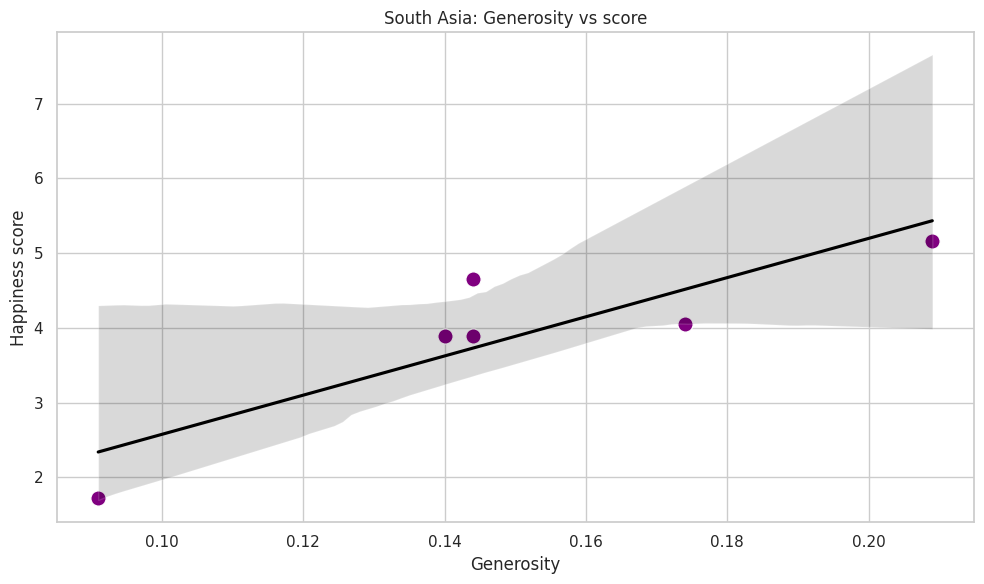

In [6]:
#Task-4-Exploring Trends Across Metrics:
# 1)Choose metrics: Freedom to make life choices, Generosity
sa_trend = south_asia_df.dropna(subset=['Freedom to make life choices', 'Generosity', 'score']).copy()

corr_freedom = sa_trend['Freedom to make life choices'].corr(sa_trend['score'])
corr_generosity = sa_trend['Generosity'].corr(sa_trend['score'])

print(f"Pearson correlation (Freedom vs score): {corr_freedom:.3f}")
print(f"Pearson correlation (Generosity vs score): {corr_generosity:.3f}")

# 2)Scatter with trendline: Freedom vs score
plt.figure()
sns.scatterplot(data=sa_trend, x='Freedom to make life choices', y='score', color='teal', s=120)
sns.regplot(data=sa_trend, x='Freedom to make life choices', y='score', scatter=False, color='black')
plt.title("South Asia: Freedom to make life choices vs score")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness score")
plt.tight_layout()
plt.show()

# 3)Scatter with trendline: Generosity vs score
plt.figure()
sns.scatterplot(data=sa_trend, x='Generosity', y='score', color='purple', s=120)
sns.regplot(data=sa_trend, x='Generosity', y='score', scatter=False, color='black')
plt.title("South Asia: Generosity vs score")
plt.xlabel("Generosity")
plt.ylabel("Happiness score")
plt.tight_layout()
plt.show()

Task- 5- Gap Analysis:
 Tasks:
 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
 for each South Asian country.
 2. Rank the South Asian countries by this gap in both ascending and descending order.
 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
 4. Analyze the reasons behind these gaps and their implications for South Asian countries.


Top by positive gap (desc):


,Country name,Log GDP per capita,score,GDP-score Gap
142,Afghanistan,0.628,1.721,-1.093
127,Sri Lanka,1.361,3.898,-2.537
128,Bangladesh,1.122,3.886,-2.764
125,India,1.166,4.054,-2.888
107,Pakistan,1.069,4.657,-3.588
92,Nepal,0.965,5.158,-4.193



Top by negative gap (asc):


,Country name,Log GDP per capita,score,GDP-score Gap
92,Nepal,0.965,5.158,-4.193
107,Pakistan,1.069,4.657,-3.588
125,India,1.166,4.054,-2.888
128,Bangladesh,1.122,3.886,-2.764
127,Sri Lanka,1.361,3.898,-2.537
142,Afghanistan,0.628,1.721,-1.093


/tmp/ipython-input-3116096736.py:20: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=gap_highlight, x='GDP-score Gap', y='Country name', hue=(gap_highlight['GDP-score Gap'] > 0), palette=['salmon', 'skyblue'])


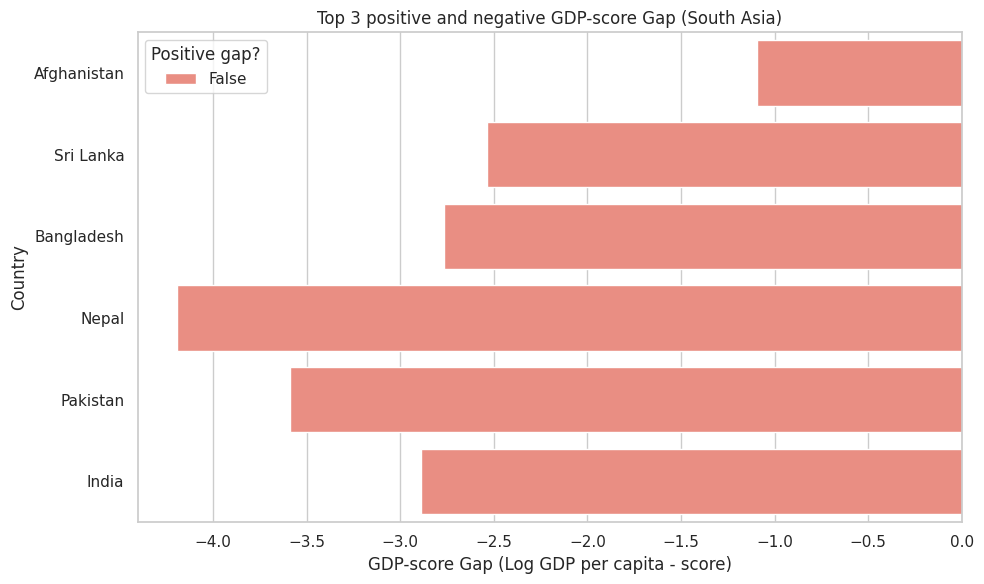

In [23]:
# Task- 5- Gap Analysis:
#1) Add GDP-score Gap = Log GDP per capita - score
sa_gap = south_asia_df.dropna(subset=['Log GDP per capita', 'score']).copy()
sa_gap['GDP-score Gap'] = sa_gap['Log GDP per capita'] - sa_gap['score']

# 2. Rank the South Asian countries by this gap in both ascending and descending order.
print("\nTop by positive gap (desc):")
display(sa_gap.sort_values('GDP-score Gap', ascending=False).head(10)[['Country name', 'Log GDP per capita', 'score', 'GDP-score Gap']])

print("\nTop by negative gap (asc):")
display(sa_gap.sort_values('GDP-score Gap', ascending=True).head(10)[['Country name', 'Log GDP per capita', 'score', 'GDP-score Gap']])

# 3)Highlight top 3 positive and negative gaps with bar chart
top3_pos = sa_gap.sort_values('GDP-score Gap', ascending=False).head(3)
top3_neg = sa_gap.sort_values('GDP-score Gap', ascending=True).head(3)
gap_highlight = pd.concat([top3_pos, top3_neg])

# 4. Analyze the reasons behind these gaps and their implications for South Asian countries.
plt.figure()
sns.barplot(data=gap_highlight, x='GDP-score Gap', y='Country name', hue=(gap_highlight['GDP-score Gap'] > 0), palette=['salmon', 'skyblue'])
plt.title("Top 3 positive and negative GDP-score Gap (South Asia)")
plt.xlabel("GDP-score Gap (Log GDP per capita - score)")
plt.ylabel("Country")
plt.legend(title='Positive gap?')
plt.tight_layout()
plt.show()

 Problem- 3- Comparative Analysis:
 Task- 1- Setup Task- Preparing the Middle Eastern Dataset:
 Tasks:
 1. Similar in Task- 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
 following list:
 middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
 "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
 "United Arab Emirates", "Yemen"]

 Complete the following task:
 1. Descriptive Statistics:
 • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
 • Which region has higher happiness Scores on average?
 2. Top and Bottom Performers:
 • Identify the top 3 and bottom 3 countries in each region based on the score.
 • Plot bar charts comparing these charts.
 3. Metric Comparisons:
 • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
 between the regions using grouped bar charts.
 • Which metrics show the largest disparity between the two regions?


MIDDLE EAST ANALYSIS & COMPARISON
Checking which Middle East countries exist in dataset:
Looking for: ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen']
Found: ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Saudi Arabia', 'United Arab Emirates', 'Yemen']

Checking for alternative naming in dataset...
Some country names in dataset that might be Middle Eastern:
  Possible match: 'Israel' (looking for 'Israel')
  Possible match: 'Kuwait' (looking for 'Kuwait')
  Possible match: 'United Arab Emirates' (looking for 'United Arab Emirates')
  Possible match: 'Saudi Arabia' (looking for 'Saudi Arabia')
  Possible match: 'Romania' (looking for 'Oman')
  Possible match: 'Bahrain' (looking for 'Bahrain')
  Possible match: 'Iraq' (looking for 'Iraq')
  Possible match: 'Iran' (looking for 'Iran')
  Possible match: 'State of Palestine' (looking for 'Palestine')
  Possible

,Country name,score
0,Nepal,5.158
1,Pakistan,4.657
2,India,4.054


South Asia - Bottom 3:


,Country name,score
0,Afghanistan,1.721
1,Bangladesh,3.886
2,Sri Lanka,3.898


Middle East - Top 3:


,Country name,score
0,Israel,7.341
1,Kuwait,6.951
2,United Arab Emirates,6.733


Middle East - Bottom 3:


,Country name,score
0,Lebanon,2.707
1,Yemen,3.561
2,Jordan,4.186


/tmp/ipython-input-327571164.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sa_top3, x='score', y='Country name', ax=axes[0], palette='viridis')
/tmp/ipython-input-327571164.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=me_top3, x='score', y='Country name', ax=axes[1], palette='magma')


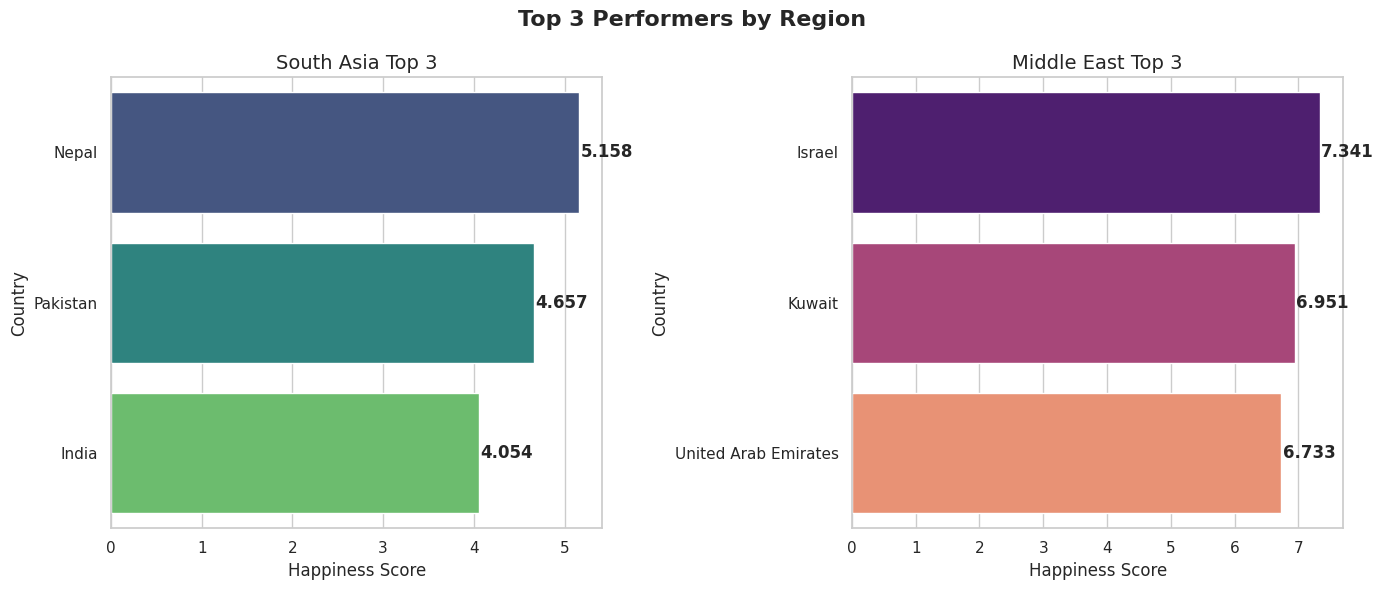

/tmp/ipython-input-327571164.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sa_bottom3, x='score', y='Country name', ax=axes[0], palette='viridis')
/tmp/ipython-input-327571164.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=me_bottom3, x='score', y='Country name', ax=axes[1], palette='magma')


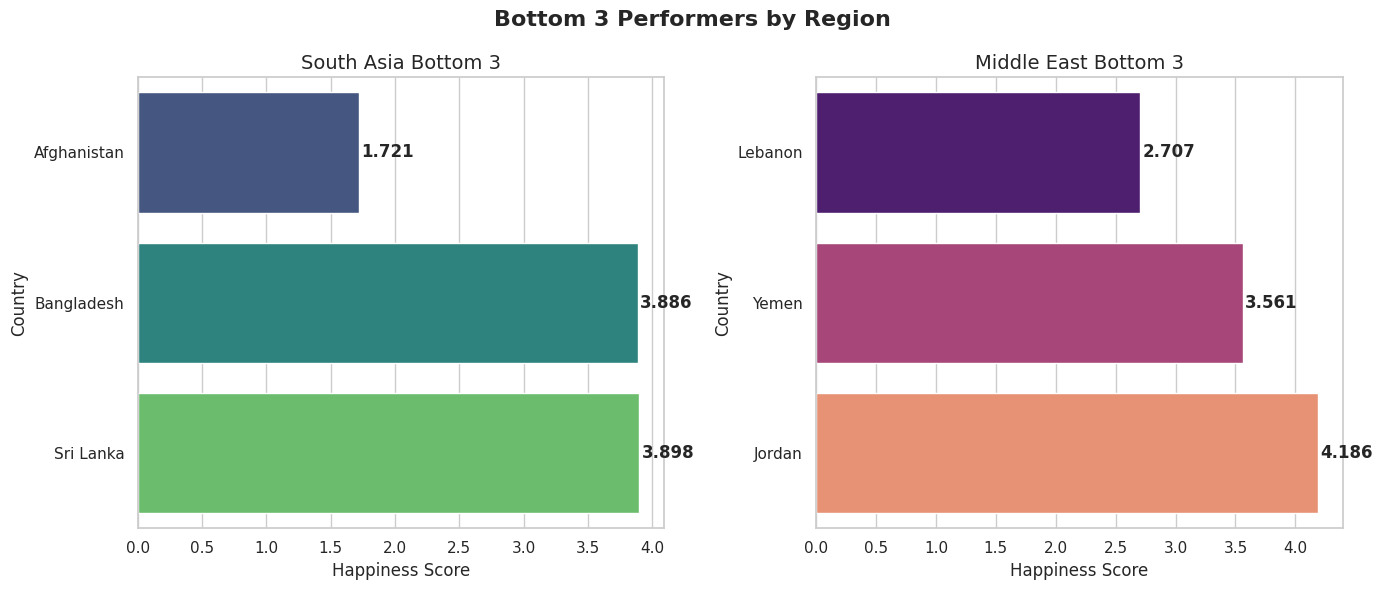


------------------------------------------------------------
3) Key Metrics Comparison
------------------------------------------------------------
Average values of key metrics:


,Metric,South Asia,Middle East
0,Log GDP per capita,1.051833,1.496333
1,Social support,0.611833,1.152778
2,Healthy life expectancy,0.420333,0.554111


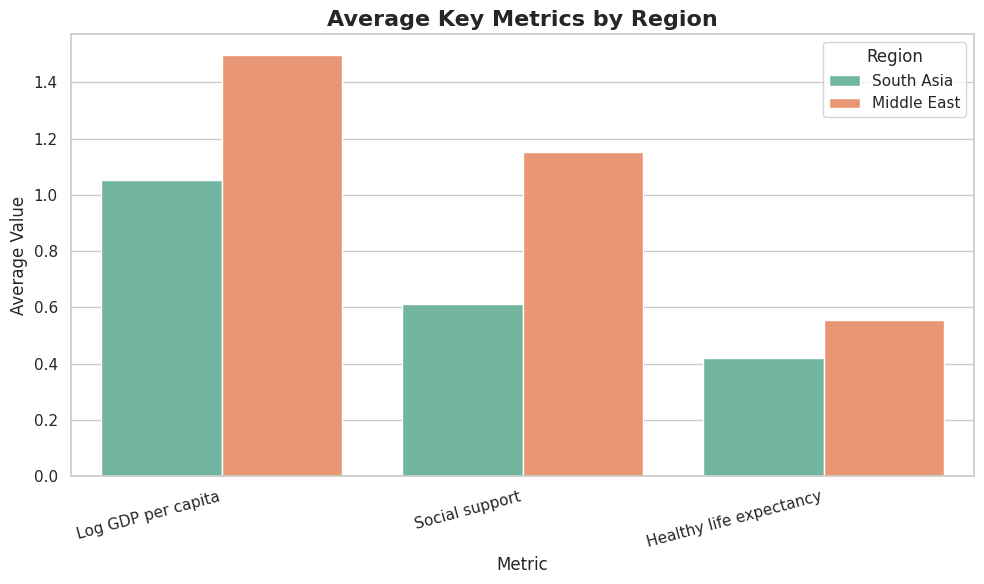


Metric disparities (Middle East - South Asia):


,Metric,South Asia,Middle East,Disparity (ME - SA),Absolute Disparity
1,Social support,0.611833,1.152778,0.540944,0.540944
0,Log GDP per capita,1.051833,1.496333,0.444500,0.444500
2,Healthy life expectancy,0.420333,0.554111,0.133778,0.133778



Largest disparity is in 'Social support': 0.541 (Middle East is higher)


In [57]:
# Task 1: Middle East dataframe
print("\n" + "="*60)
print("MIDDLE EAST ANALYSIS & COMPARISON")
print("="*60)

# Define Middle East countries list
middle_east_list = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

# Check which Middle East countries actually exist in the dataset
existing_countries = df['Country name'].values
me_countries_in_dataset = [country for country in middle_east_list if country in existing_countries]

print("Checking which Middle East countries exist in dataset:")
print(f"Looking for: {middle_east_list}")
print(f"Found: {me_countries_in_dataset}")

# Check for alternative names
print("\nChecking for alternative naming in dataset...")
all_countries_in_df = list(df['Country name'].values)
print("Some country names in dataset that might be Middle Eastern:")

# Find potential matches
for country in all_countries_in_df:
    country_lower = country.lower()
    for me_country in middle_east_list:
        if me_country.lower() in country_lower or country_lower in me_country.lower():
            print(f"  Possible match: '{country}' (looking for '{me_country}')")

# Based on typical World Happiness Report naming:
# Common variations: "State of Palestine" instead of "Palestine"
middle_east_df = df[df['Country name'].isin([
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Saudi Arabia", "United Arab Emirates", "Yemen",
    "State of Palestine"  # This is how Palestine is usually listed
])].copy()

print(f"\nMiddle East countries found in this dataset ({len(middle_east_df)} countries):")
print(sorted(list(middle_east_df['Country name'])))

# 1) Descriptive statistics: Mean and Std of score
print("\n" + "-"*60)
print("1) Descriptive Statistics")
print("-"*60)

# Make sure south_asia_df exists (from previous code)
if 'south_asia_df' not in locals() and 'south_asia_df' not in globals():
    print("ERROR: south_asia_df not found. Please run South Asia analysis first.")
    # Create a dummy for testing if needed
    south_asia_list = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
    south_asia_df = df[df['Country name'].isin(south_asia_list)].copy()
    print("Created south_asia_df for comparison")

sa_mean = south_asia_df['score'].mean()
sa_std = south_asia_df['score'].std()
me_mean = middle_east_df['score'].mean()
me_std = middle_east_df['score'].std()

print(f"South Asia - Mean score: {sa_mean:.3f}, Std: {sa_std:.3f}")
print(f"Middle East - Mean score: {me_mean:.3f}, Std: {me_std:.3f}")

if sa_mean > me_mean:
    diff = sa_mean - me_mean
    print(f"Higher average happiness: South Asia (by {diff:.3f})")
elif me_mean > sa_mean:
    diff = me_mean - sa_mean
    print(f"Higher average happiness: Middle East (by {diff:.3f})")
else:
    print("Both regions have equal average happiness scores")

# 2) Top and bottom 3 by score in each region
print("\n" + "-"*60)
print("2) Top and Bottom Performers")
print("-"*60)

# Get top and bottom 3 for each region
sa_top3 = south_asia_df.sort_values('score', ascending=False).head(3)
sa_bottom3 = south_asia_df.sort_values('score', ascending=True).head(3)
me_top3 = middle_east_df.sort_values('score', ascending=False).head(3)
me_bottom3 = middle_east_df.sort_values('score', ascending=True).head(3)

print("South Asia - Top 3:")
display(sa_top3[['Country name', 'score']].reset_index(drop=True))

print("South Asia - Bottom 3:")
display(sa_bottom3[['Country name', 'score']].reset_index(drop=True))

print("Middle East - Top 3:")
display(me_top3[['Country name', 'score']].reset_index(drop=True))

print("Middle East - Bottom 3:")
display(me_bottom3[['Country name', 'score']].reset_index(drop=True))

# Plot bar charts comparing top performers
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Top 3 Performers by Region", fontsize=16, fontweight='bold')

# South Asia top 3
sns.barplot(data=sa_top3, x='score', y='Country name', ax=axes[0], palette='viridis')
axes[0].set_title("South Asia Top 3", fontsize=14)
axes[0].set_xlabel("Happiness Score", fontsize=12)
axes[0].set_ylabel("Country", fontsize=12)

# Add value labels
for i, v in enumerate(sa_top3['score']):
    axes[0].text(v + 0.02, i, f'{v:.3f}', va='center', fontweight='bold')

# Middle East top 3
sns.barplot(data=me_top3, x='score', y='Country name', ax=axes[1], palette='magma')
axes[1].set_title("Middle East Top 3", fontsize=14)
axes[1].set_xlabel("Happiness Score", fontsize=12)
axes[1].set_ylabel("Country", fontsize=12)

# Add value labels
for i, v in enumerate(me_top3['score']):
    axes[1].text(v + 0.02, i, f'{v:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Plot bar charts comparing bottom performers
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Bottom 3 Performers by Region", fontsize=16, fontweight='bold')

# South Asia bottom 3
sns.barplot(data=sa_bottom3, x='score', y='Country name', ax=axes[0], palette='viridis')
axes[0].set_title("South Asia Bottom 3", fontsize=14)
axes[0].set_xlabel("Happiness Score", fontsize=12)
axes[0].set_ylabel("Country", fontsize=12)

# Add value labels
for i, v in enumerate(sa_bottom3['score']):
    axes[0].text(v + 0.02, i, f'{v:.3f}', va='center', fontweight='bold')

# Middle East bottom 3
sns.barplot(data=me_bottom3, x='score', y='Country name', ax=axes[1], palette='magma')
axes[1].set_title("Middle East Bottom 3", fontsize=14)
axes[1].set_xlabel("Happiness Score", fontsize=12)
axes[1].set_ylabel("Country", fontsize=12)

# Add value labels
for i, v in enumerate(me_bottom3['score']):
    axes[1].text(v + 0.02, i, f'{v:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 3) Metric comparisons: grouped bars for GDP, Social support, Healthy life expectancy
print("\n" + "-"*60)
print("3) Key Metrics Comparison")
print("-"*60)

metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Handle missing values by taking mean of available data
sa_metrics = south_asia_df[metrics].mean()
me_metrics = middle_east_df[metrics].mean()

compare_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': sa_metrics.values,
    'Middle East': me_metrics.values
})

print("Average values of key metrics:")
display(compare_df)

# Create melted DataFrame for plotting
compare_df_melt = compare_df.melt(id_vars='Metric', var_name='Region', value_name='Average')

plt.figure(figsize=(10, 6))
sns.barplot(data=compare_df_melt, x='Metric', y='Average', hue='Region', palette='Set2')
plt.title("Average Key Metrics by Region", fontsize=16, fontweight='bold')
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# Identify largest disparity
compare_df['Disparity (ME - SA)'] = compare_df['Middle East'] - compare_df['South Asia']
compare_df['Absolute Disparity'] = abs(compare_df['Disparity (ME - SA)'])

print("\nMetric disparities (Middle East - South Asia):")
display(compare_df[['Metric', 'South Asia', 'Middle East', 'Disparity (ME - SA)', 'Absolute Disparity']]
        .sort_values('Absolute Disparity', ascending=False))

largest_disparity = compare_df.loc[compare_df['Absolute Disparity'].idxmax()]
print(f"\nLargest disparity is in '{largest_disparity['Metric']}': "
      f"{largest_disparity['Disparity (ME - SA)']:.3f} "
      f"(Middle East is {'higher' if largest_disparity['Disparity (ME - SA)'] > 0 else 'lower'})")



4. Happiness Disparity:

  • Compute the range (max- min) and coefficient of variation (CV) for Score in both regions.
  
  • Which region has greater variability in happiness?

 5. Correlation Analysis:

  • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
 Generosity within each region.

  • Create scatter plots to visualize and interpret the relationships.

 6. Outlier Detection:

  • Identify outlier countries in both regions based on Score and GDP per Capita.

  • Plot these outliers and discuss their implications.

 7. Visualization:

  • Create boxplots comparing the distribution of Score between South Asia and the Middle East.

  • Interpret the key differences in distribution shapes, medians, and outliers.


------------------------------------------------------------
4) Happiness Score Variability
------------------------------------------------------------

South Asia - range: 3.437, CV: 0.302
Middle East - range: 4.634, CV: 0.279
Greater variability (by CV): South Asia

South Asia correlations:
Freedom vs Score: 0.801, Generosity vs Score: 0.875
Middle East correlations:
Freedom vs Score: 0.863, Generosity vs Score: 0.628


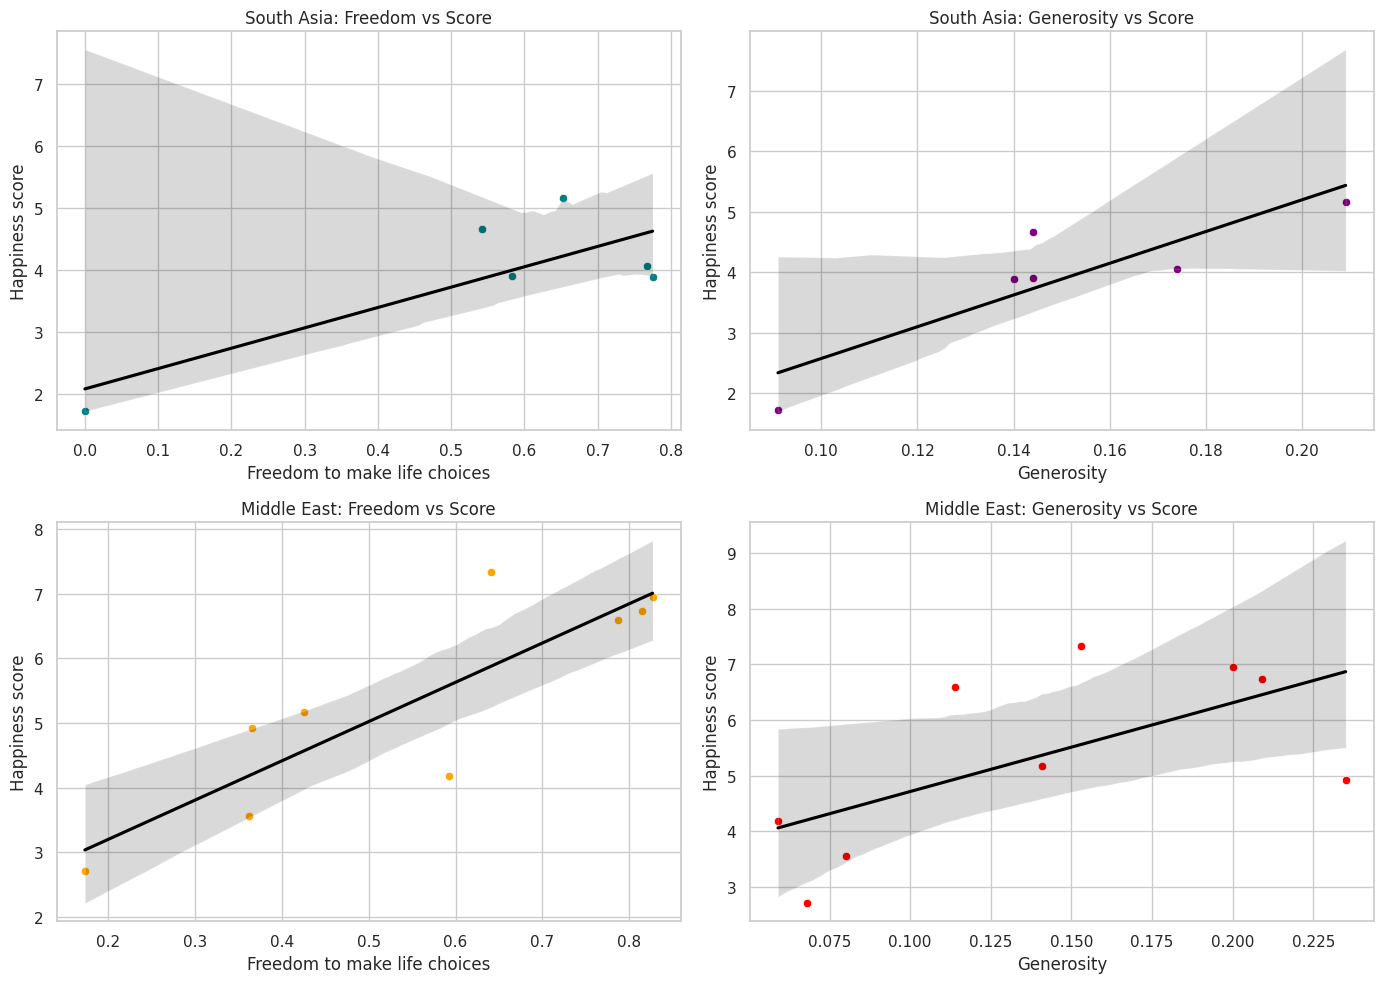


South Asia outliers:


,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


Middle East outliers:


,Country name,score,Log GDP per capita


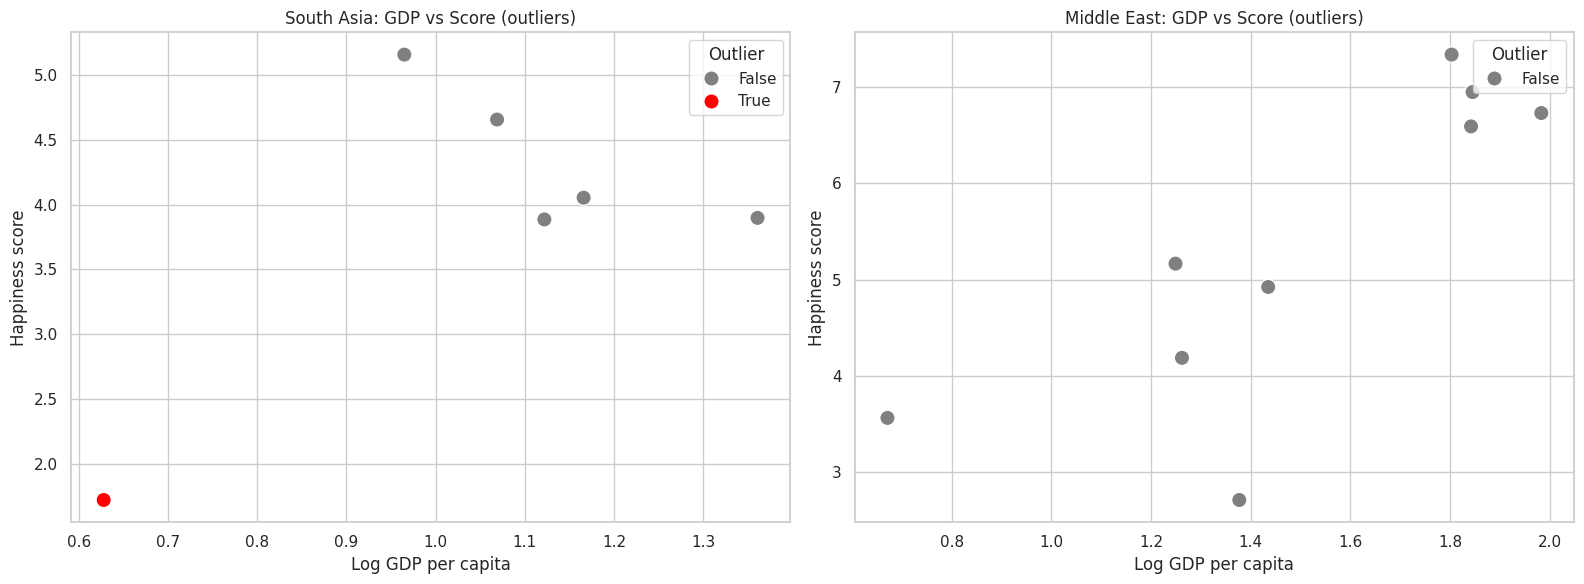

/tmp/ipython-input-2020031452.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_compare, x='Region', y='score', palette='pastel')


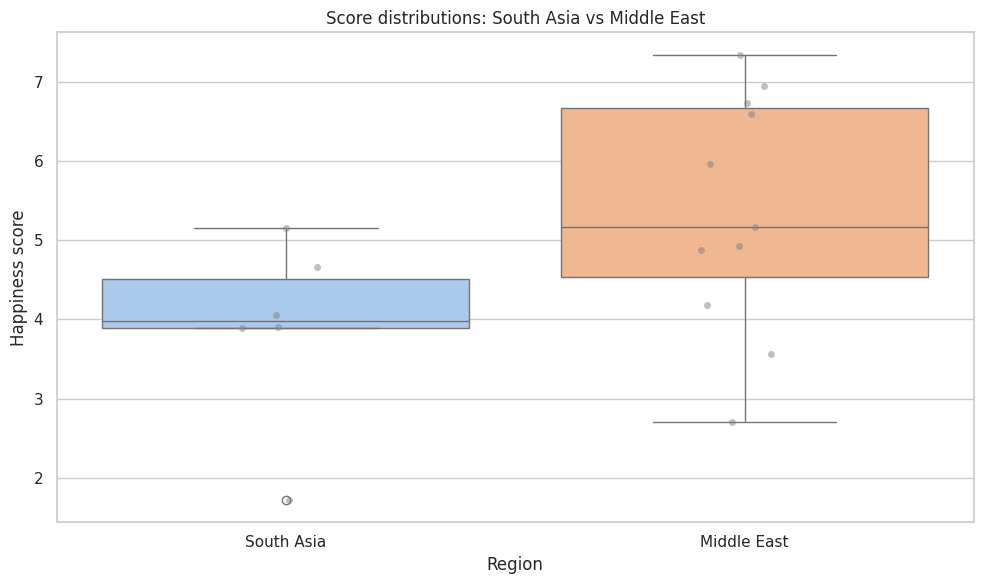

In [58]:
# 4) Happiness disparity: range and coefficient of variation (CV = std/mean)
print("\n" + "-"*60)
print("4) Happiness Score Variability")
print("-"*60)

def range_and_cv(series):
    r = series.max() - series.min()
    cv = series.std() / series.mean() if series.mean() != 0 else np.nan
    return r, cv

sa_range, sa_cv = range_and_cv(south_asia_df['score'])
me_range, me_cv = range_and_cv(middle_east_df['score'])

print(f"\nSouth Asia - range: {sa_range:.3f}, CV: {sa_cv:.3f}")
print(f"Middle East - range: {me_range:.3f}, CV: {me_cv:.3f}")
greater_variability = "South Asia" if sa_cv > me_cv else "Middle East"
print(f"Greater variability (by CV): {greater_variability}")

# 5) Correlation analysis (Freedom, Generosity) with Score, per region
sa_corr_df = south_asia_df.dropna(subset=['score', 'Freedom to make life choices', 'Generosity']).copy()
me_corr_df = middle_east_df.dropna(subset=['score', 'Freedom to make life choices', 'Generosity']).copy()

sa_corr_freedom = sa_corr_df['Freedom to make life choices'].corr(sa_corr_df['score'])
sa_corr_generosity = sa_corr_df['Generosity'].corr(sa_corr_df['score'])

me_corr_freedom = me_corr_df['Freedom to make life choices'].corr(me_corr_df['score'])
me_corr_generosity = me_corr_df['Generosity'].corr(me_corr_df['score'])

print("\nSouth Asia correlations:")
print(f"Freedom vs Score: {sa_corr_freedom:.3f}, Generosity vs Score: {sa_corr_generosity:.3f}")
print("Middle East correlations:")
print(f"Freedom vs Score: {me_corr_freedom:.3f}, Generosity vs Score: {me_corr_generosity:.3f}")

# Scatter plots per region
fig, axes = plt.subplots(2, 2, figsize=(14,10))
sns.scatterplot(data=sa_corr_df, x='Freedom to make life choices', y='score', ax=axes[0,0], color='teal')
sns.regplot(data=sa_corr_df, x='Freedom to make life choices', y='score', ax=axes[0,0], scatter=False, color='black')
axes[0,0].set_title("South Asia: Freedom vs Score")

sns.scatterplot(data=sa_corr_df, x='Generosity', y='score', ax=axes[0,1], color='purple')
sns.regplot(data=sa_corr_df, x='Generosity', y='score', ax=axes[0,1], scatter=False, color='black')
axes[0,1].set_title("South Asia: Generosity vs Score")

sns.scatterplot(data=me_corr_df, x='Freedom to make life choices', y='score', ax=axes[1,0], color='orange')
sns.regplot(data=me_corr_df, x='Freedom to make life choices', y='score', ax=axes[1,0], scatter=False, color='black')
axes[1,0].set_title("Middle East: Freedom vs Score")

sns.scatterplot(data=me_corr_df, x='Generosity', y='score', ax=axes[1,1], color='red')
sns.regplot(data=me_corr_df, x='Generosity', y='score', ax=axes[1,1], scatter=False, color='black')
axes[1,1].set_title("Middle East: Generosity vs Score")

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel())
    ax.set_ylabel("Happiness score")
plt.tight_layout()
plt.show()

# 6) Outlier detection for both regions (score + GDP via 1.5×IQR)
def label_outliers(df_region):
    d = df_region.dropna(subset=['score', 'Log GDP per capita']).copy()
    mask_score, _ = iqr_outliers(d['score'])
    mask_gdp, _ = iqr_outliers(d['Log GDP per capita'])
    d['Outlier'] = mask_score | mask_gdp
    return d

sa_outliers = label_outliers(south_asia_df)
me_outliers = label_outliers(middle_east_df)

print("\nSouth Asia outliers:")
display(sa_outliers[sa_outliers['Outlier']][['Country name','score','Log GDP per capita']])

print("Middle East outliers:")
display(me_outliers[me_outliers['Outlier']][['Country name','score','Log GDP per capita']])

# Plot outliers
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(data=sa_outliers, x='Log GDP per capita', y='score', hue='Outlier', ax=axes[0], palette={False:'gray',True:'red'}, s=120)
axes[0].set_title("South Asia: GDP vs Score (outliers)")

sns.scatterplot(data=me_outliers, x='Log GDP per capita', y='score', hue='Outlier', ax=axes[1], palette={False:'gray',True:'red'}, s=120)
axes[1].set_title("Middle East: GDP vs Score (outliers)")
for ax in axes:
    ax.set_xlabel("Log GDP per capita")
    ax.set_ylabel("Happiness score")
plt.tight_layout()
plt.show()

# 7) Visualization: Boxplots comparing Score distributions
plt.figure()
subset_compare = pd.concat([
    south_asia_df.assign(Region='South Asia')[['Region','score']],
    middle_east_df.assign(Region='Middle East')[['Region','score']]
])

sns.boxplot(data=subset_compare, x='Region', y='score', palette='pastel')
sns.stripplot(data=subset_compare, x='Region', y='score', color='gray', alpha=0.5)
plt.title("Score distributions: South Asia vs Middle East")
plt.xlabel("Region")
plt.ylabel("Happiness score")
plt.tight_layout()
plt.show()